# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

[Data pekerjaan data di indonesia pada situs kalibrr](https://www.kalibrr.id/job-board/te/data/1)<br>
`Kalibrr` adalah perusahaan yang menyediakan platform untuk rekrutmen pekerja. Berasal dari Filipina yang mulai beroperasi di Indonesia sejak 2016. Perusahaan menggabungkan platform rekrutmen berbasis AI dan layanan employer branding untuk membantu perusahaan menunjukkan nilai-nilai mereka, menarik kandidat tepat, dan merealisasikan proses yang mulus.

Dari Halaman tersebut carilah 
- title pekerjaan , 
- lokasi pekerjaan , 
- tanggal pekerjaan di post 
- dan dealine submit permohonan,
- dan perusahaan


- tariklah 15 halaman
- Buatlah plot dari jumlah pekerjaan berdasarkan lokasi.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [3]:
import requests
from bs4 import BeautifulSoup 

temp = [] # var penampung

for page_num in range(1, 16):    
    url = f'https://www.kalibrr.id/job-board/te/data/{page_num}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Mencari 15 elemen a dengan class 'class' pada halaman tersebut
    Title = soup.find_all('a', attrs={'class':'k-text-primary-color'})[:15]
    Location = soup.find_all('a', attrs={'class':'k-text-subdued k-block'})[:15]
    #post_on
    Post_on = soup.find_all('span', attrs={'class':'k-block k-mb-1'})[:15]
    #get deadline
    Deadline = soup.find_all('span', attrs={'class':'k-block k-mb-1'})[:15]
    # Mencari 15 elemen span dengan class 'class-span' pada halaman tersebut
    Company = soup.find_all('span', {'class':'k-inline-flex k-items-center k-mb-1'})[:15]

    
    # Menampilkan teks dari 15 elemen a yang ditemukan pada halaman tersebut
    for a in Title:
        print(a.text.strip())
        
    for a in Location:
        print(a.text.strip())
        
    for span in Post_on:
        print(span.text.strip())
        
    for span in Deadline:
        print(span.text.strip())

    for span in Company:
        print(span.text.strip())
    
    # Menambahkan data yang telah di looping secara otomatis (dengan append) ke masing2 variabel
    temp.append((Title, Location, Post_on, Deadline, Company)) 

Project Manager
Network  Security Engineer
IT System Analyst
DevOps and Data Engineer
Data Analytics Manager
Senior Data Engineer
Data Entry
Data Quality Analyst
Data Scientist
Data Engineer
IOS & Android Developer
Data Analyst
Android Developer
Moderation Trainers
Quality Assurance
Jakarta, Indonesia
Jakarta, Indonesia
Jakarta, Indonesia
Tangerang Selatan, Indonesia
Kota Jakarta Barat, Indonesia
North Jakarta, Indonesia
South Jakarta, Indonesia
Central Jakarta City, Indonesia
Tangerang Selatan, Indonesia
South Tangerang, Indonesia
Jakarta Barat, Indonesia
Jakarta Selatan, Indonesia
Jakarta Selatan, Indonesia
Denpasar, Indonesia
Denpasar, Indonesia
Posted 9 days ago • Apply before 29 Jun
Posted 7 days ago • Apply before 19 Apr
Posted 16 days ago • Apply before 19 Apr
Posted 8 days ago • Apply before 13 May
Posted 6 days ago • Apply before 29 Apr
Posted 3 hours ago • Apply before 30 May
Posted 12 days ago • Apply before 30 May
Posted 9 days ago • Apply before 1 May
Posted a month ago • 

View All
View All
Senior Content Writer
Relationship Manager (Surabaya based)
Customer Relations Coordinator
Senior Business Development Executive
IT MIS & Customer Application
Operations Online Staff
Research and Development Intern
Credit & Industry Specialist
Collection - Penempatan Banyuwangi
Anti Fraud Officer
Senior Partnership
Motion Graphic Designer - KOMPAS TV
Data Center System Operator & Facility Management
SAP MM/WM Consultant
Machine Learning Engineer
North Jakarta, Indonesia
Surabaya, Indonesia
South Jakarta, Indonesia
Jakarta Selatan, Indonesia
South Jakarta, Indonesia
Kota Jakarta Selatan, Indonesia
Jakarta Barat, Indonesia
Central Jakarta City, Indonesia
Banyuwangi, Indonesia
South Jakarta, Indonesia
Kota Jakarta Selatan, Indonesia
West Jakarta, Indonesia
Central Jakarta, Indonesia
Jakarta Pusat, Indonesia
Jakarta Pusat, Indonesia
Posted a month ago • Apply before 29 Apr
Posted 8 days ago • Apply before 19 Mar
Posted a month ago • Apply before 29 Apr
Posted 2 days ago •

KeyboardInterrupt: 

In [ ]:
# proses ekstraksi data dari variabel "temp_new"

data = []
for page_data in temp:
    
    #1 Mengekstrak list yang telah dibuat dalam looping sebelumnya menjadi informasi text
    title_new = [Title.text.strip() for Title in page_data[0]]
    location_new = [Location.text.strip() for Location in page_data[1]]
    post_on_new = [Post_on.text.strip() for Post_on in page_data[2]]
    deadline_new = [Deadline.text.strip() for Deadline in page_data[3]]
    company_new = [Company.text.strip() for Company in page_data[4]]
    
    #2 Menambahkan list yang baru saja dibentuk dengan operator penambahan list (+=) dan menggabungkannya dengan list(zip())
    data += list(zip(title_new, location_new, post_on_new, deadline_new, company_new))

## Save data scrap into .csv

In [2]:
import pandas as pd
df = pd.DataFrame(data, columns=['title', 'location', 'post_on', 'deadline', 'company'])
df.to_csv('vacancy.csv', index=None)

NameError: name 'data' is not defined

In [3]:
df = pd.read_csv('vacancy.csv')
df

,title,location,post_on,deadline,company
0,Project Manager,"Jakarta, Indonesia",Posted 9 days ago • Apply before 29 Jun,Posted 9 days ago • Apply before 29 Jun,PGI Data
1,IT System Analyst,"Jakarta, Indonesia",Posted 16 days ago • Apply before 19 Apr,Posted 16 days ago • Apply before 19 Apr,PGI Data
2,Data Analytics Manager,"Kota Jakarta Barat, Indonesia",Posted 6 days ago • Apply before 29 Apr,Posted 6 days ago • Apply before 29 Apr,PT Adicipta Inovasi Teknologi
3,DevOps and Data Engineer,"Tangerang Selatan, Indonesia",Posted 8 days ago • Apply before 13 May,Posted 8 days ago • Apply before 13 May,Mobius Digital
4,Network Security Engineer,"Jakarta, Indonesia",Posted 7 days ago • Apply before 19 Apr,Posted 7 days ago • Apply before 19 Apr,PGI Data
...,...,...,...,...,...
220,Relationship Manager,"Jakarta Selatan, Indonesia",Posted 23 days ago • Apply before 17 Mar,Posted 23 days ago • Apply before 17 Mar,Investree
221,Lead Digital Strategic - Digital Agency,"West Jakarta, Indonesia",Posted 3 months ago • Apply before 16 Jun,Posted 3 months ago • Apply before 16 Jun,Kompas Gramedia
222,Digital Marketing Lead,"Bogor Kota, Indonesia",Posted 7 days ago • Apply before 30 May,Posted 7 days ago • Apply before 30 May,PT Gema Mulia Semesta (SOUVIA)
223,Security Support Officer,"South Jakarta, Indonesia",Posted a month ago • Apply before 5 May,Posted a month ago • Apply before 5 May,Home Credit Indonesia


In [4]:
df.dtypes

title       object
location    object
post_on     object
deadline    object
company     object
dtype: object

## Data Cleaning

### Cleaning Location

In [5]:
df.location.nunique()

37

In [6]:
df['location'] = df['location'].str.replace(", Indonesia","")
df['location'] = df['location'].str.replace("Kota Jakarta Barat","Jakarta Barat")
df['location'] = df['location'].str.replace("Central Jakarta City","Jakarta Pusat")
df['location'] = df['location'].str.replace("Central Jakarta","Jakarta Pusat")
df['location'] = df['location'].str.replace("South Jakarta","Jakarta Selatan")
df['location'] = df['location'].str.replace("North Jakarta","Jakarta Utara")
df['location'] = df['location'].str.replace("South Tangerang","Tangerang Selatan")
df['location'] = df['location'].str.replace("West Jakarta","Jakarta Barat")
df['location'] = df['location'].str.replace("East Jakarta","Jakarta Timur")
df['location'] = df['location'].str.replace("Kota Jakarta Selatan","Jakarta Selatan")
df['location'] = df['location'].str.replace("Jakarta Selatan City","Jakarta Selatan")
df['location'] = df['location'].str.replace("Kota Jakarta Pusat","Jakarta Pusat")
df['location'] = df['location'].str.replace("Depok City","Depok")
df['location'] = df['location'].str.replace("Sukabumi City","Sukabumi")
df['location'] = df['location'].str.replace("West Lombok","Lombok Barat")

print(df.location.sort_values().unique())
print(df.location.nunique())

['Bandung Kota' 'Banjarmasin' 'Banyuwangi' 'Bogor Kota' 'Denpasar' 'Depok'
 'Jakarta' 'Jakarta Barat' 'Jakarta Pusat' 'Jakarta Selatan'
 'Jakarta Timur' 'Jakarta Utara' 'Jember' 'Jembrana' 'Kupang'
 'Lampung Tengah' 'Lombok Barat' 'Medan' 'Sleman' 'Sukabumi' 'Surabaya'
 'Tangerang' 'Tangerang Kabupaten' 'Tangerang Kota' 'Tangerang Selatan'
 'Yogyakarta']
26


### Cleaning post_on dan deadline

In [7]:
print(df.deadline.nunique())

120


In [8]:
# cleaning post_on
df['post_on'] = df['post_on'].str.split('•').str[0]
df.post_on = df.post_on.str.replace("Posted","")

# cleaning_deadline
df.deadline = df.deadline.str[32:]

def clean_data(x):
    if isinstance(x, str):
        x = x.replace('e ', '')
        x = x.replace('re ', '')
        x = x.replace('r', '')
        x = x.replace('for ', '')
        x = x.replace('fo', '')
        x = x.replace('Ap', 'Apr')
        x = x.replace('Ma', 'May')
        x = x.replace('Mayy', 'May')
    return x
df['deadline'] = df['deadline'].apply(clean_data)
# remove space in front
df.deadline = df.deadline.str.lstrip()
print(df.deadline.sort_values().unique())
print(df.deadline.nunique())

['1 Jun' '1 May' '10 Jul' '10 Jun' '10 May' '11 Dec' '11 Jun' '11 May'
 '12 Apr' '12 Dec' '12 May' '13 Jun' '13 May' '14 Apr' '14 Jan' '14 Jun'
 '15 Apr' '15 May' '16 Jun' '16 May' '17 Apr' '17 May' '18 Apr' '18 Aug'
 '18 May' '19 Apr' '19 May' '19 Sep' '20 Apr' '20 May' '21 Apr' '21 May'
 '22 Apr' '22 May' '23 Apr' '23 Jul' '24 Apr' '24 Dec' '24 May' '25 Apr'
 '25 May' '26 Apr' '26 May' '27 Apr' '27 Dec' '27 May' '28 Apr' '28 May'
 '29 Apr' '29 Jun' '29 May' '3 Jun' '3 Oct' '30 Apr' '30 Aug' '30 Dec'
 '30 Jul' '30 Jun' '30 May' '30 Oct' '4 Jun' '4 May' '5 May' '6 Jun'
 '6 May' '7 Dec' '7 May' '8 Jun' '8 May' '9 Aug' '9 Jul' '9 Jun' '9 Oct']
73


In [9]:
df

,title,location,post_on,deadline,company
0,Project Manager,Jakarta,9 days ago,29 Jun,PGI Data
1,IT System Analyst,Jakarta,16 days ago,19 Apr,PGI Data
2,Data Analytics Manager,Jakarta Barat,6 days ago,29 Apr,PT Adicipta Inovasi Teknologi
3,DevOps and Data Engineer,Tangerang Selatan,8 days ago,13 May,Mobius Digital
4,Network Security Engineer,Jakarta,7 days ago,19 Apr,PGI Data
...,...,...,...,...,...
220,Relationship Manager,Jakarta Selatan,23 days ago,17 May,Investree
221,Lead Digital Strategic - Digital Agency,Jakarta Barat,3 months ago,16 Jun,Kompas Gramedia
222,Digital Marketing Lead,Bogor Kota,7 days ago,30 May,PT Gema Mulia Semesta (SOUVIA)
223,Security Support Officer,Jakarta Selatan,a month ago,5 May,Home Credit Indonesia


In [10]:
# Buatlah plot dari jumlah pekerjaan berdasarkan lokasi
# fill this
cat_order = df.groupby('location').agg({
'title' : 'count'
 }).sort_values('title', ascending=True).reset_index().tail(15)
cat_order

,location,title
11,Jember,2
12,Depok,2
13,Banjarmasin,2
14,Sleman,3
15,Denpasar,4
16,Bandung Kota,5
17,Jakarta Timur,8
18,Surabaya,8
19,Tangerang Selatan,10
20,Jakarta Utara,17


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

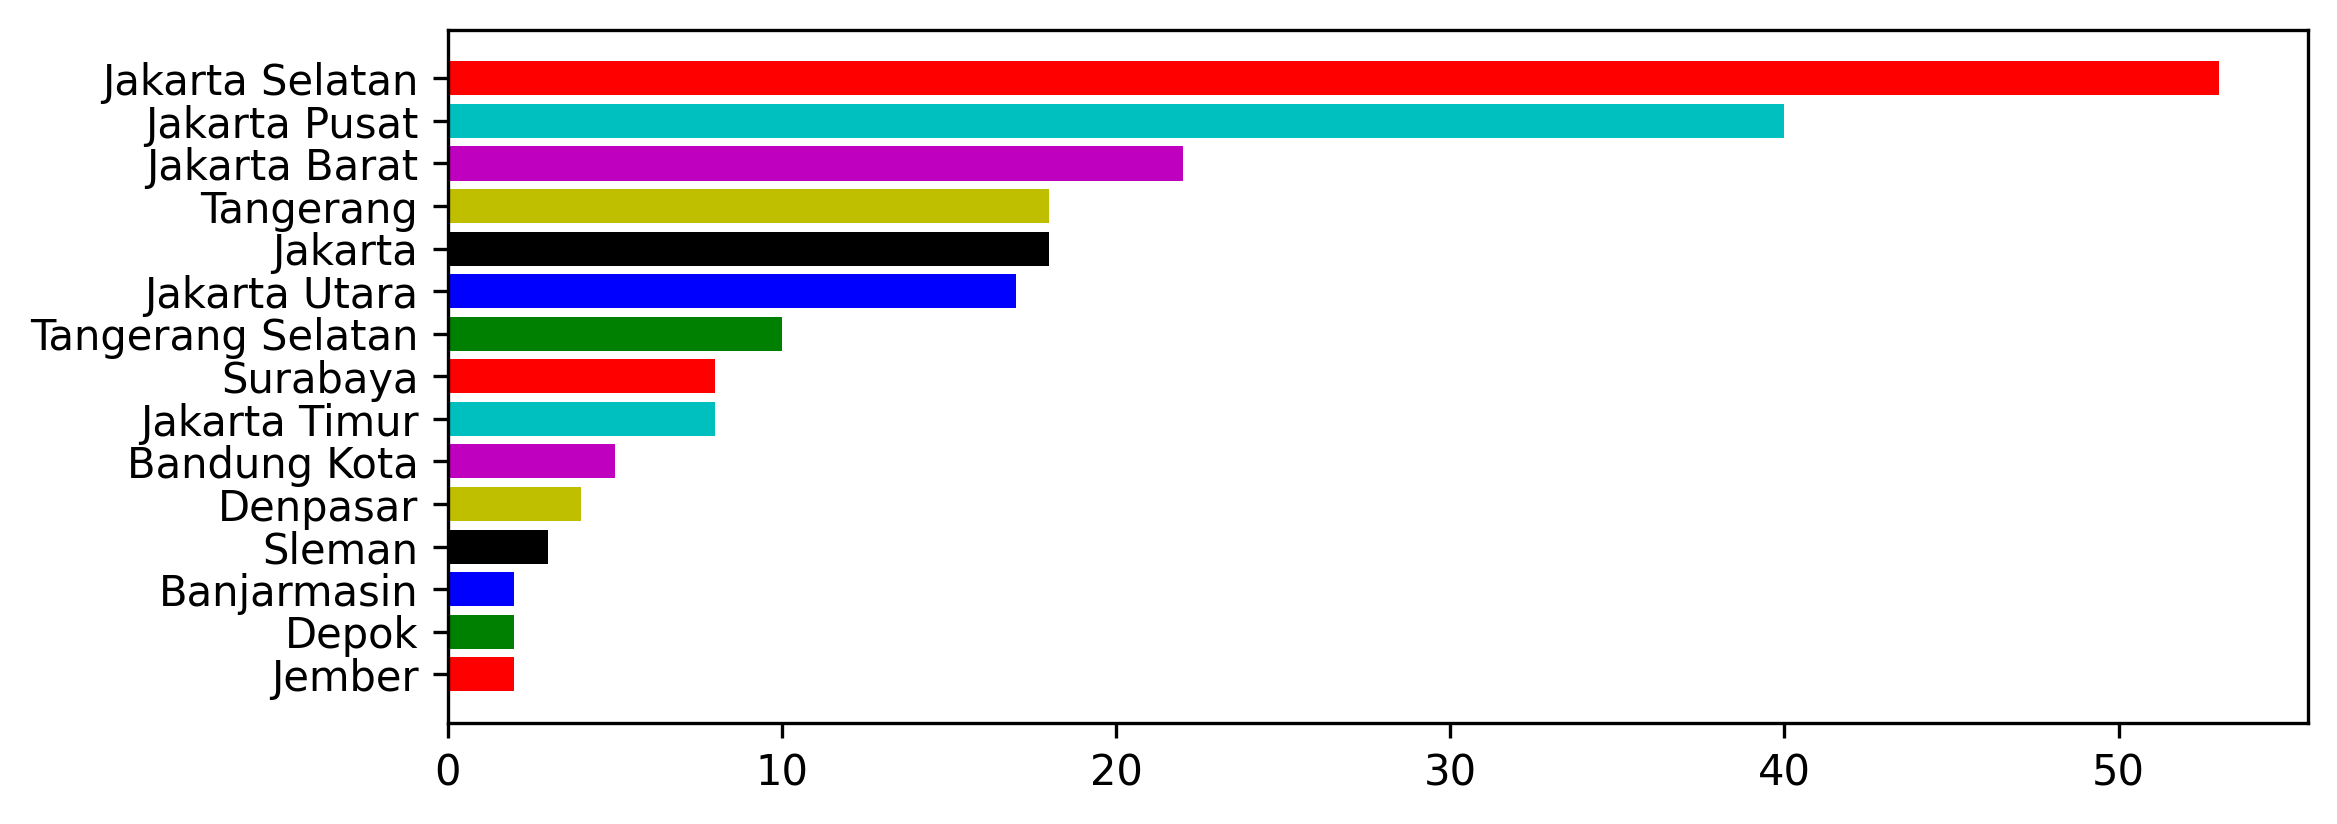

In [11]:
import matplotlib.pyplot as plt

X = cat_order['location']
Y = cat_order['title']
my_colors = ['r','g','b','k','y','m','c']
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
plt.barh(X,Y, color=my_colors);
plt.savefig('cat_order.png',bbox_inches="tight");

**simple analysis:** <br>
jakarta especially jakarta selatan has the most vacancy in 'data' occupation than any location, second is jakarta pusat.

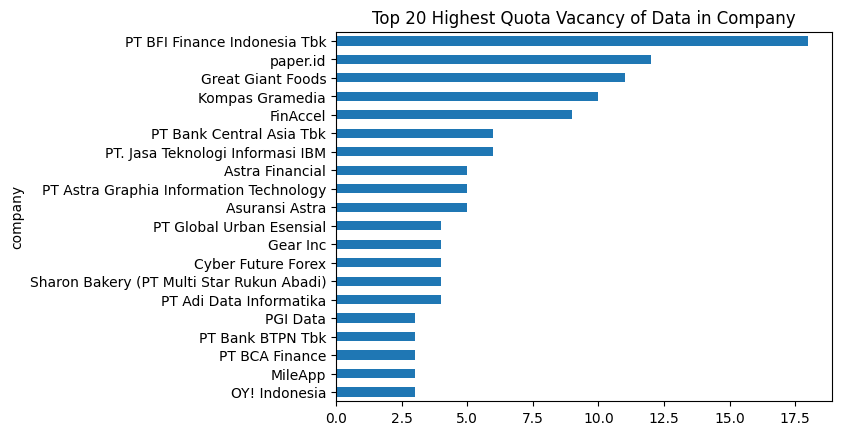

In [26]:
import pandas as pd
pd.crosstab(
 index=df['company'],
 columns='Total Vacancy of Company',
).sort_values(by='Total Vacancy of Company', ascending=True).tail(20).plot.barh(legend=None, title='Top 20 Highest Quota Vacancy of Data in Company');

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.